# Which genres are most popular from year to year?

>import libraries and read the data set

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('tmdb-movies.csv')

> shape of the data frame

In [5]:
df.shape

(10866, 21)

> Columns of the data frame for better understanding

In [6]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

> visuvalizing the head of data

In [7]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


>Description of data to clear the null values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

>The column ‘popularity’ has no NaN, so it not needed to drop nulls, but the value counts of the popularity has long list of float values. Which will be hard to analyze. So, we round of the popularity column to nearest integer.

In [9]:
df['popularity']= round(df['popularity'])

In [10]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,33.0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.0,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


>Now, value counts of popularity counts looks as.

In [11]:
df['popularity'].value_counts()

0.0     6739
1.0     3211
2.0      540
3.0      189
4.0       72
5.0       39
6.0       36
7.0       11
8.0       10
9.0        8
11.0       3
13.0       2
14.0       1
10.0       1
12.0       1
25.0       1
28.0       1
33.0       1
Name: popularity, dtype: int64

>But there are outliers we need popularity on scale 10, so we drop the rows with popularity above 9.0. 

In [12]:
df = df[df['popularity'] <= 9.0]

>This is how the popularity looks after cleaning.

In [13]:
df['popularity'].value_counts()

0.0    6739
1.0    3211
2.0     540
3.0     189
4.0      72
5.0      39
6.0      36
7.0      11
8.0      10
9.0       8
Name: popularity, dtype: int64

>We then check for duplicated rows and drop them

In [14]:
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,1.0,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [15]:
df = df.drop(2090)

In [16]:
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [17]:
df.shape

(10854, 21)

>With the following data frame, we have many genres, most of the genres have little movies associated with them, which are trivial for our analyzation, so we filter them out.

In [18]:
df = df.groupby("genres").filter(lambda x: len(x) >= 50)

>we just used groupby to filter out genre elements whose contents are more than 50, i.e we dropped genres with movies less than 50.

In [19]:
df.shape

(4708, 21)

In [20]:
df['genres'].value_counts()

Comedy                         712
Drama                          712
Documentary                    312
Drama|Romance                  289
Comedy|Drama                   280
Comedy|Romance                 268
Horror|Thriller                259
Horror                         253
Comedy|Drama|Romance           222
Drama|Thriller                 138
Comedy|Family                  102
Action|Thriller                100
Thriller                        93
Drama|Comedy                    92
Animation|Family                90
Crime|Drama|Thriller            81
Crime|Drama                     74
Comedy|Horror                   72
Drama|Comedy|Romance            64
Action                          63
Action|Comedy                   62
Drama|History                   58
Action|Crime|Drama|Thriller     54
Drama|Horror|Thriller           53
Action|Crime|Thriller           52
Horror|Science Fiction          52
Horror|Mystery|Thriller         51
Comedy|Crime                    50
Name: genres, dtype:

>We groupby release_year and genres column and take the mean of the popularity column, we use mean over sum, because sum overlooks the importance of genres of little movies but with more popularity, so we take mean of popularity column

In [21]:
res = df.groupby(['release_year','genres'])['popularity'].mean().reset_index()

>We then take the list of all genres with maximum popularity in each year.

In [22]:
sol = list()
for year in res['release_year'].unique():
    sol.append(res.loc[(res[res['release_year']==year]['popularity'].max()==res['popularity']) & (res['release_year']==year)])

>Now we define a function to get the most popular genres for a given year.

In [2]:
def popular_genre(year):
    for i in range(len(sol)):
        if all(sol[i]['release_year']==year):
            return sol[i]['genres'], plt.pie(res[res['release_year']==year]['popularity'],labels= res[res['release_year']==year]['genres']);

(159    Crime|Drama
Name: genres, dtype: object, ([<matplotlib.patches.Wedge object at 0x00000294989A7F98>, <matplotlib.patches.Wedge object at 0x00000294989B1C18>, <matplotlib.patches.Wedge object at 0x00000294989BE898>, <matplotlib.patches.Wedge object at 0x00000294989C7518>, <matplotlib.patches.Wedge object at 0x00000294989CE198>, <matplotlib.patches.Wedge object at 0x00000294989CEDD8>, <matplotlib.patches.Wedge object at 0x00000294989D6A58>, <matplotlib.patches.Wedge object at 0x00000294989DD6D8>, <matplotlib.patches.Wedge object at 0x00000294989E6358>, <matplotlib.patches.Wedge object at 0x00000294989E6F98>, <matplotlib.patches.Wedge object at 0x0000029498624DA0>, <matplotlib.patches.Wedge object at 0x00000294989F5828>, <matplotlib.patches.Wedge object at 0x00000294989FF4A8>, <matplotlib.patches.Wedge object at 0x0000029498A05128>], [<matplotlib.text.Text object at 0x00000294989B1748>, <matplotlib.text.Text object at 0x00000294989BE3C8>, <matplotlib.text.Text object at 0x000002949

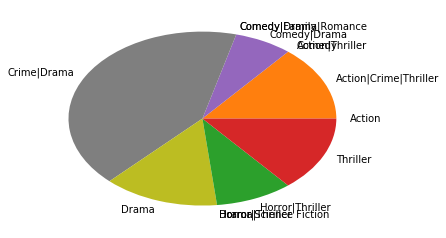

In [24]:
print(popular_genre(1976));

>So, we give a year to the function and it will give out all the genres according to its popularity in a pie chart.

Enter year for popular genre1995
(472    Action|Thriller
Name: genres, dtype: object, ([<matplotlib.patches.Wedge object at 0x0000029498BA6B00>, <matplotlib.patches.Wedge object at 0x0000029498BAF780>, <matplotlib.patches.Wedge object at 0x0000029498BB7400>, <matplotlib.patches.Wedge object at 0x0000029498BC1080>, <matplotlib.patches.Wedge object at 0x0000029498BC1CC0>, <matplotlib.patches.Wedge object at 0x0000029498BC7940>, <matplotlib.patches.Wedge object at 0x0000029498BD05C0>, <matplotlib.patches.Wedge object at 0x0000029498BD8240>, <matplotlib.patches.Wedge object at 0x0000029498BD8E80>, <matplotlib.patches.Wedge object at 0x0000029498BE3B00>, <matplotlib.patches.Wedge object at 0x0000029498B46CF8>, <matplotlib.patches.Wedge object at 0x0000029498BEF390>, <matplotlib.patches.Wedge object at 0x0000029498BEFFD0>, <matplotlib.patches.Wedge object at 0x0000029498BFCC50>, <matplotlib.patches.Wedge object at 0x0000029498C058D0>, <matplotlib.patches.Wedge object at 0x0000029498C0D550>, 

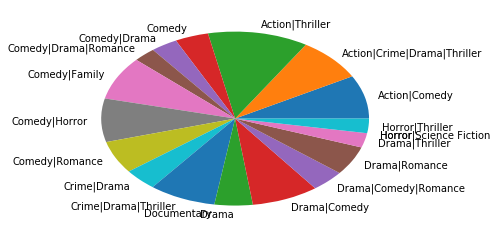

In [27]:
year = int(input('Enter year for popular genre'))
print(popular_genre(year))

In [272]:
res[res['release_year']==2015]

,release_year,genres,popularity
957,2015,Action,1.000000
958,2015,Action|Crime|Drama|Thriller,0.000000
959,2015,Action|Crime|Thriller,4.666667
960,2015,Action|Thriller,0.666667
961,2015,Animation|Family,0.000000
962,2015,Comedy,0.648649
963,2015,Comedy|Drama,1.444444
964,2015,Comedy|Drama|Romance,0.500000
965,2015,Comedy|Horror,0.166667
966,2015,Comedy|Romance,0.000000


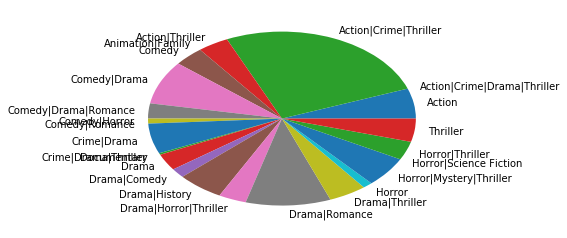

In [276]:
plt.pie(res[res['release_year']==2015]['popularity'],labels= res[res['release_year']==2015]['genres']);